[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/dimensionality-reduction/PCA.ipynb)

In [33]:
#importing library to print multiple lines in one code shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# !pip install ipyvolume -q
import ipyvolume as ipv

In [3]:
!git clone https://github.com/khetansarvesh/Tabular-Cross-Sectional-Modelling.git

Cloning into 'Tabular-Cross-Sectional-Modelling'...
remote: Enumerating objects: 593, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 593 (delta 20), reused 3 (delta 1), pack-reused 554
Receiving objects: 100% (593/593), 10.97 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (354/354), done.


# **Dataset**

In [4]:
df = pd.read_csv('Tabular-Cross-Sectional-Modelling/dataset/Wine.csv')
df
df.shape
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


(178, 14)

In [5]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(np.array(X))
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# **PCA - Library Implementation**

## All components

In [30]:
pca = PCA(n_components = None)
X_new = pca.fit_transform(X)
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [31]:
#Eigenvalues
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [32]:
# Eigenvectors
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
5,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
6,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
7,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
8,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
9,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


## 3D Projection

In [ ]:
# hence we can see first 3 components accomodates 67% of the variation
pca = PCA(n_components = 3)
X_new = pca.fit_transform(X)
pd.DataFrame(X_new)

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [ ]:
def visualize_3d(x, labels):
    # Workaround as axis limits are not auto-scaling
    x_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    fig = ipv.figure(height=400, width=400)
    x, y, z = x_norm[:, 0], x_norm[:, 1], x_norm[:, 2]

    # Colors
    cmap = plt.get_cmap('Greens', 3)
    color = cmap(labels)
    ipv.scatter(x, y, z, size=4, marker="sphere", color=color)
    ipv.show()

visualize_3d(X_new, Y)

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## 2D Projection

In [ ]:
# hence we can see first 2 components accomodates 55% of the variation
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)
pd.DataFrame(X_new)

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


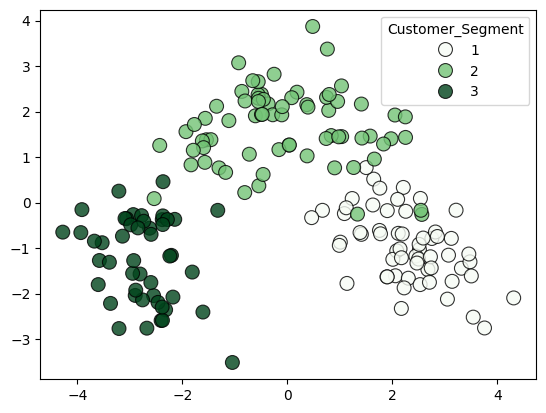

In [ ]:
def visualize_2d(x, labels):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, s=100, alpha=0.8, palette="Greens", edgecolor="black")
visualize_2d(X_new, Y)

# **PCA - Custom Implementation**

### Step 1 : Calculating covariance matrix

In [17]:
cov = np.cov(X.T)
pd.DataFrame(cov)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
1,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
2,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
3,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
4,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
5,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
6,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
7,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
8,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
9,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


### Step 2 : Calculating Eignvalue and Eignvector of Covariance Matrix


In [44]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [45]:
#Eigenvalues
eig_vals

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [46]:
# Eigenvectors
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.144329,0.483652,0.207383,-0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
1,0.245188,0.224931,-0.089013,0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
2,0.002051,0.316069,-0.626224,-0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
3,0.239320,-0.010591,-0.612080,0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
4,-0.141992,0.299634,-0.130757,-0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
5,-0.394661,0.065040,-0.146179,0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
6,-0.422934,-0.003360,-0.150682,0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
7,0.298533,0.028779,-0.170368,-0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
8,-0.313429,0.039302,-0.149454,0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
9,0.088617,0.529996,0.137306,0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


In [47]:
# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.144329,0.483652,-0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
1,-0.245188,0.224931,0.089013,0.536890,0.035214,0.536814,0.420524,0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
2,-0.002051,0.316069,0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
3,-0.239320,-0.010591,0.612080,0.060859,0.066103,-0.100825,-0.286969,0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
4,0.141992,0.299634,0.130757,-0.351797,0.727049,0.038144,0.322883,0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
5,0.394661,0.065040,0.146179,0.198068,-0.149318,-0.084122,-0.027925,-0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
6,0.422934,-0.003360,0.150682,0.152295,-0.109026,-0.018920,-0.060685,0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
7,-0.298533,0.028779,0.170368,-0.203301,-0.500703,-0.258594,0.595447,0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
8,0.313429,0.039302,0.149454,0.399057,0.136860,-0.533795,0.372139,-0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
9,-0.088617,0.529996,-0.137306,0.065926,-0.076437,-0.418644,-0.227712,-0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


### Step 3 : Calculating Reduced EignVector
we are reducing it into 2d hence we will consider only the first two eign vectors

In [48]:
reduced_eig_vecs = eig_vecs[:,:2]
pd.DataFrame(reduced_eig_vecs)

,0,1
0,0.144329,0.483652
1,-0.245188,0.224931
2,-0.002051,0.316069
3,-0.239320,-0.010591
4,0.141992,0.299634
5,0.394661,0.065040
6,0.422934,-0.003360
7,-0.298533,0.028779
8,0.313429,0.039302
9,-0.088617,0.529996


### Step 4 : Project Data

In [49]:
X_new = X.dot(reduced_eig_vecs)
X_new

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347
